# Kalman Filter Notebook
This notebook gives an example of the Kalman Filter for sensor fusion. We read light intensity from two noisy [Grove Light Sensors v1.1](https://www.seeedstudio.com/Grove-Light-Sensor-p-746.html), and use the Kalman Filter to estimate the true light intensity. This is achieved by taking a weighted average of estimates and measurements, with more weight being applied to estimates with higher certainty. 

### 2. Kalman Filter Model

To setup the Kalman Filter, we need to

1. Define the state and input variables
2. Define a state equation which predicts/estimates the next state (denoted **f**)
3. Define an observation equation, relating the state to our measurements (denoted **h**)

Once the system has been described, we are left with two linear gaussian equations (one each for estimations and observations). The Kalman Filter is then used to form a weighted sum of each equation, trading off our uncertainty in each model. Therefore, as a system designer we need to establish whether we are more confident in our state estimation equation, or our measurements. We control this using parameters **qval** and **rval**. As observed in the luminance plot above, our measurements are very noisy for sensor B. Therefore we will chose a large rval for sensor B, indicating higher uncertainty about out those measurements. 


We define the **state** as a vector consisting of the true value and derivative of the luminance. Therefore, number of states **n=2**. Additionally, we only take measurments from two light sensors. Therefore, number of observations **m=2**. Once the state and input variables have been identified, the [PYNQ-EKF build flow](https://github.com/sfox14/pynq-ekf/blob/master/build/build.md) can be used to generate the bitstream (.bit) and library (.so). It is necessary to build new ".bit" and ".so" files for each new configuration of **n=?** and **m=?**, but not for each application. Our KF/EKF architecture implements all application specific code in software.  


In [1]:
import numpy as np
import os
import sys
import time
from ekf.light_ekf import Light_EKF

# load dataset
a = np.loadtxt("lightA.csv", delimiter=",")
b = np.loadtxt("lightB.csv", delimiter=",")
data = np.hstack((a,b)).reshape(len(a),-1)

### 3. Software Version

We can run this and plot the results

In [3]:
kf = Light_EKF(n=2, m=2)
res_sw = kf.run_sw(data)

### 4. Hardware Version

We chose to only implement the application-independent parts of the algorithm on the FPGA. This gives users the ability to test different system models before deployment. In ekf_notebook.ipynb, we give an example of deploying an entire algorithm to the FPGA.

<img src="imgs/ekf_arch.jpg">

In [4]:
res_hw = kf.run_hw(data)

In [5]:
res_hw_q = kf.toFloat(res_hw)

In [6]:
print(res_hw_q-res_sw)

[[ 7.52900776e-07 -1.08417712e-06]
 [ 7.07772858e-07 -2.58539669e-07]
 [ 1.62243426e-06 -3.08958472e-07]
 [ 1.35432368e-06 -3.88264189e-07]
 [ 9.22026382e-07 -1.29313372e-06]
 [-7.49913541e-07 -2.31224599e-06]
 [-1.64357190e-06 -2.61244342e-06]
 [-3.90649866e-06 -2.97414800e-06]
 [-3.09290307e-06 -1.80991406e-06]
 [-4.01049095e-06 -2.15816580e-06]
 [-4.11987573e-06 -1.74915908e-06]
 [-5.09152108e-06 -2.23307465e-06]
 [-1.98342587e-06 -2.23616887e-07]
 [-2.43084150e-06 -6.38930259e-07]
 [-3.43198290e-06 -1.59264263e-06]
 [-2.94045876e-06 -2.07458258e-06]
 [-2.16161012e-06 -6.82355973e-07]
 [-3.38641073e-06 -2.71925130e-06]
 [-2.17593530e-06 -1.22733826e-06]
 [-2.06776343e-06 -1.94342554e-06]
 [-3.12604855e-06 -2.89838021e-06]
 [-2.94710180e-06 -2.43199370e-06]
 [-3.20076682e-06 -1.20853275e-06]
 [-5.41822383e-06 -3.61316089e-06]
 [-5.36433866e-06 -2.75245327e-06]
 [-5.13120418e-06 -2.17229381e-06]
 [-3.73735497e-06 -5.63604838e-07]
 [-4.39883943e-07  1.58750964e-06]
 [ 9.57678230e-08  1

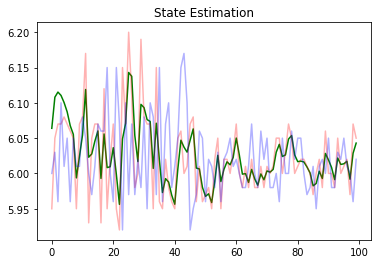

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.title("State Estimation")
x = np.arange(len(res_sw)) 
plt.plot(x, res_hw_q[:,0], "g")
plt.plot(x, data[:,0], "r", alpha=0.3)
plt.plot(x, data[:,1], "b", alpha=0.3)
plt.show()